In [3]:
%matplotlib inline
import csv as csv
import numpy as np

wdir = '/Users/dwhitehead/Documents/github/kaggle/titanic/'

csv_file_object = csv.reader(open(wdir + 'train.csv', 'rb'))
header = csv_file_object.next()
data = []

for row in csv_file_object:
    data.append(row)
data = np.array(data)

In [4]:
print data[0:15,5]
print type(data[0:15,5])
# ages_onboard = data[0::,5].astype(np.float)

['22' '38' '26' '35' '35' '' '54' '2' '27' '14' '4' '58' '20' '39' '14']
<type 'numpy.ndarray'>


In [5]:
import pandas as pd
import numpy as np

wdir = '/Users/dwhitehead/Documents/github/kaggle/titanic/'

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv(wdir + 'train.csv', header=0)
df_test = pd.read_csv(wdir + 'test.csv', header=0)
print df.dtypes
print df.info()
print df.describe()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.00

In [6]:
print df['Age'].median()
print df[df['Age'] > 60][['Sex', 'Pclass', 'Age', 'Survived']]
# print df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

28.0
        Sex  Pclass   Age  Survived
33     male       2  66.0         0
54     male       1  65.0         0
96     male       1  71.0         0
116    male       3  70.5         0
170    male       1  61.0         0
252    male       1  62.0         0
275  female       1  63.0         1
280    male       3  65.0         0
326    male       3  61.0         0
438    male       1  64.0         0
456    male       1  65.0         0
483  female       3  63.0         1
493    male       1  71.0         0
545    male       1  64.0         0
555    male       1  62.0         0
570    male       2  62.0         1
625    male       1  61.0         0
630    male       1  80.0         1
672    male       2  70.0         0
745    male       1  70.0         0
829  female       1  62.0         1
851    male       3  74.0         0


In [7]:
for i in range(1,4):
    print i, len(df[ (df['Sex'] == 'male') & (df['Pclass'] == i) ])

1 122
2 108
3 347


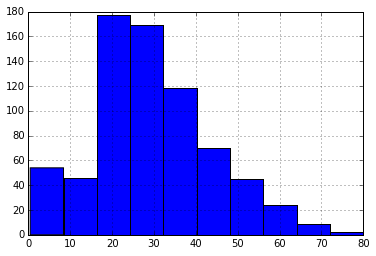

In [8]:
import pylab as P
df['Age'].hist()

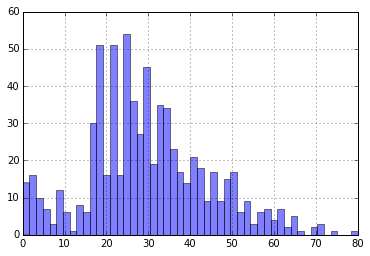

In [9]:
df['Age'].dropna().hist(bins=50, range=(0,80), alpha = .5)

In [59]:
df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )
df['Gender2'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
# test
df_test['Gender'] = df_test['Sex'].map( lambda x: x[0].upper() )
df_test['Gender2'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

KeyError: 'Sex'

In [11]:
print df['Sex'].head()
print df['Gender'].head()
print df['Gender2'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
0    M
1    F
2    F
3    F
4    M
Name: Gender, dtype: object
0    1
1    0
2    0
3    0
4    1
Name: Gender2, dtype: int64


In [12]:
print df.Embarked.unique()
print df.Embarked.describe()
for x in df.Embarked.unique():
    print x, len(df[df.Embarked == x])
    
df['Embarked_full'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df_test['Embarked_full'] = df_test['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
print df.Embarked_full.head()

['S' 'C' 'Q' nan]
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
S 644
C 168
Q 77
nan 0
0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Embarked_full, dtype: object


In [13]:
median_ages = np.zeros((2,3))
print median_ages
for i in range(0, 2):
    print i
    for j in range(0, 3):
        print i, j
        median_ages[i,j] = df[(df['Gender2'] == i) & (df['Pclass'] == j+1)]['Age'].dropna().median()
print median_ages

[[ 0.  0.  0.]
 [ 0.  0.  0.]]
0
0 0
0 1
0 2
1
1 0
1 1
1 2
[[ 35.   28.   21.5]
 [ 40.   30.   25. ]]


In [14]:
df['AgeFill'] = df['Age']
print df.head()
df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked Gender  Gender2  \
0      0         A/5 21171   7.2500   NaN        S      M        1   
1      0          PC 17599  71.2833   C85        C      F        0   
2      0  STON/O2. 3101282   7.9250   NaN        S      F        0   
3      0            113803  53.1000  C123     

,Gender,Pclass,Age,AgeFill
5,M,3,NaN,NaN
17,M,2,NaN,NaN
19,F,3,NaN,NaN
26,M,3,NaN,NaN
28,F,3,NaN,NaN
29,M,3,NaN,NaN
31,F,1,NaN,NaN
32,F,3,NaN,NaN
36,M,3,NaN,NaN
42,M,3,NaN,NaN


In [15]:
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df.Age.isnull()) & (df.Gender2 == i) & (df.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,M,3,NaN,25.0
17,M,2,NaN,30.0
19,F,3,NaN,21.5
26,M,3,NaN,25.0
28,F,3,NaN,21.5
29,M,3,NaN,25.0
31,F,1,NaN,35.0
32,F,3,NaN,21.5
36,M,3,NaN,25.0
42,M,3,NaN,25.0


In [16]:
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
print df[df.Age.isnull()].head()

    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked Gender  Gender2  \
5       0      0  330877   8.4583   NaN        Q      M        1   
17      0      0  244373  13.0000   NaN        S      M        1   
19      0      0    2649   7.2250   NaN        C      F        0   
26      0      0    2631   7.2250   NaN        C      M        1   
28      0      0  330959   7.8792   NaN        Q      F        0   

   Embarked_full  AgeFill  AgeIsNull  
5     Queenstown     25.0          1  
17   Southampton     30.0 

In [17]:
print df.sample(n=10, axis=0)

     PassengerId  Survived  Pclass                                   Name  \
520          521         1       1                  Perreault, Miss. Anne   
821          822         1       3                      Lulic, Mr. Nikola   
725          726         0       3                    Oreskovic, Mr. Luka   
88            89         1       1             Fortune, Miss. Mabel Helen   
158          159         0       3                    Smiljanic, Mr. Mile   
329          330         1       1           Hippach, Miss. Jean Gertrude   
847          848         0       3                     Markoff, Mr. Marin   
511          512         0       3                      Webber, Mr. James   
221          222         0       2                   Bracken, Mr. James H   
742          743         1       1  Ryerson, Miss. Susan Parker "Suzette"   

        Sex  Age  SibSp  Parch            Ticket      Fare            Cabin  \
520  female   30      0      0             12749   93.5000              B

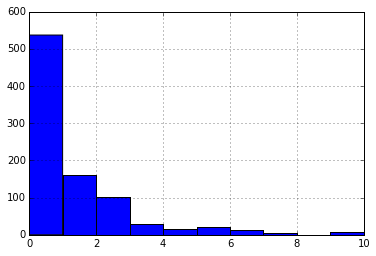

In [18]:
# feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['Age*Class'] = df.AgeFill * df.Pclass
df['FamilySize'].hist()

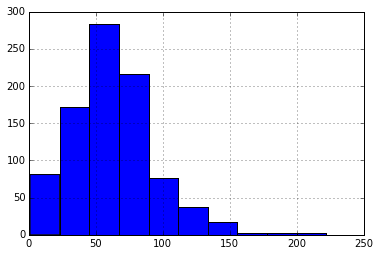

In [19]:
df['Age*Class'].hist()

In [20]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
Gender           891 non-null object
Gender2          891 non-null int64
Embarked_full    889 non-null object
AgeFill          891 non-null float64
AgeIsNull        891 non-null int64
FamilySize       891 non-null int64
Age*Class        891 non-null float64
dtypes: float64(4), int64(8), object(7)
memory usage: 139.2+ KB
None


In [21]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]

Name             object
Sex              object
Ticket           object
Cabin            object
Embarked         object
Gender           object
Embarked_full    object
dtype: object

In [22]:
print df.Cabin.describe()
print df[~df.Cabin.isnull()].Cabin.sample(n=10)

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object
453     C92
298    C106
871     D35
377     C82
194      B4
716     C45
520     B73
781     B20
550     C70
748     D30
Name: Cabin, dtype: object


In [23]:
def category_to_factor(df, category_col):
    mapper = {}
    for i, x in enumerate(df[category_col].unique()):
        mapper.update({x: i})
    df[category_col + '_int'] = df[category_col].map(mapper).astype(int)
    
    return df

In [24]:
df = category_to_factor(df, 'Embarked')
print df[['Embarked_int', 'Embarked', 'Embarked_full']].sample(100)

     Embarked_int Embarked Embarked_full
741             0        S   Southampton
283             0        S   Southampton
481             0        S   Southampton
598             1        C     Cherbourg
663             0        S   Southampton
134             0        S   Southampton
307             1        C     Cherbourg
660             0        S   Southampton
487             1        C     Cherbourg
692             0        S   Southampton
191             0        S   Southampton
836             0        S   Southampton
317             0        S   Southampton
54              1        C     Cherbourg
243             0        S   Southampton
66              0        S   Southampton
219             0        S   Southampton
794             0        S   Southampton
713             0        S   Southampton
333             0        S   Southampton
842             1        C     Cherbourg
537             1        C     Cherbourg
862             0        S   Southampton
573             

In [33]:
print df.dtypes[df.dtypes.map(lambda x: x=='object')]
# df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Age', 'Gender', 'Embarked_full'], axis=1)
df = df.drop(['Gender', 'Embarked_full'], axis=1)
print df

Gender           object
Embarked_full    object
dtype: object
     PassengerId  Survived  Pclass  SibSp  Parch      Fare  Gender2  AgeFill  \
0              1         0       3      1      0    7.2500        1     22.0   
1              2         1       1      1      0   71.2833        0     38.0   
2              3         1       3      0      0    7.9250        0     26.0   
3              4         1       1      1      0   53.1000        0     35.0   
4              5         0       3      0      0    8.0500        1     35.0   
5              6         0       3      0      0    8.4583        1     25.0   
6              7         0       1      0      0   51.8625        1     54.0   
7              8         0       3      3      1   21.0750        1      2.0   
8              9         1       3      0      2   11.1333        0     27.0   
9             10         1       2      1      0   30.0708        0     14.0   
10            11         1       3      1      1   16.7000

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. 

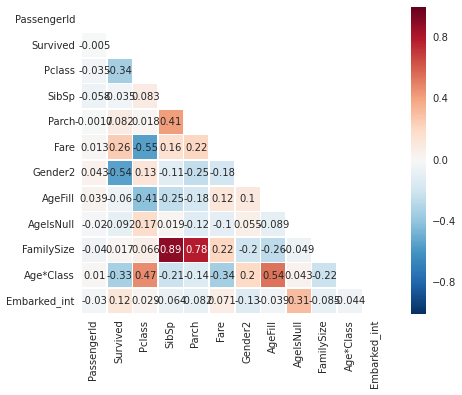

In [54]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.zeros_like(df.corr())
print mask
mask[np.triu_indices_from(mask)] = True
print mask

with sns.axes_style("white"):
    sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.1, square=True)

# sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.1)

# plt.pcolor(df.corr())
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.show()

# print df.describe()
# print df.corr().head(1)
# for idx, row in df.corr().iterrows():
#     print idx
#     for i, x in enumerate(row):
#         print i, x

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0. 

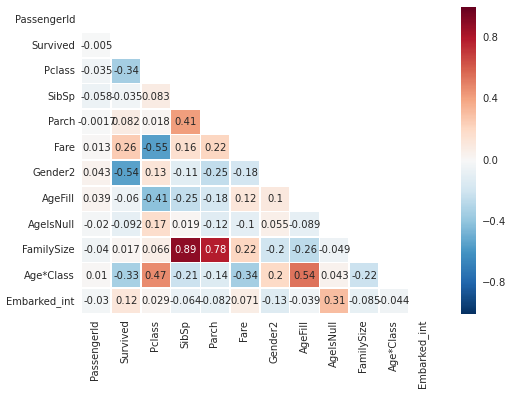

In [55]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

def corr_plot(df):    
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f4d8890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110a69650>]], dtype=object)

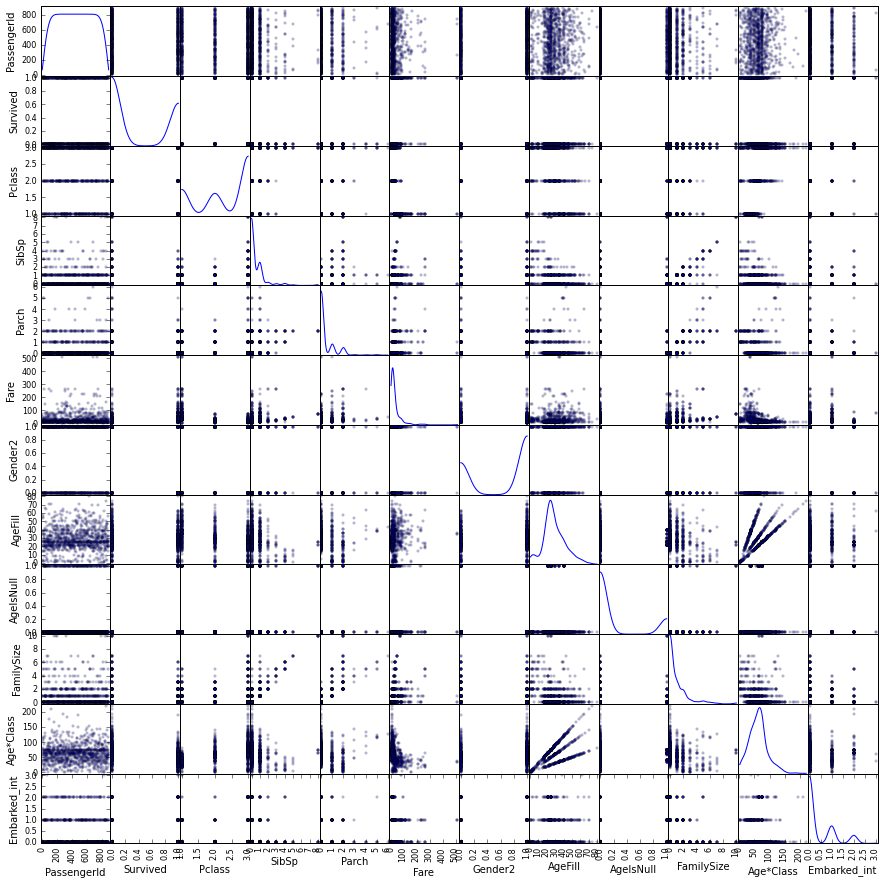

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [57]:
print df.head()
train_data = df.values
print train_data

   PassengerId  Survived  Pclass  SibSp  Parch     Fare  Gender2  AgeFill  \
0            1         0       3      1      0   7.2500        1       22   
1            2         1       1      1      0  71.2833        0       38   
2            3         1       3      0      0   7.9250        0       26   
3            4         1       1      1      0  53.1000        0       35   
4            5         0       3      0      0   8.0500        1       35   

   AgeIsNull  FamilySize  Age*Class  Embarked_int  
0          0           1         66             0  
1          0           1         38             1  
2          0           0         78             0  
3          0           1         35             0  
4          0           0        105             0  
[[   1.     0.     3.  ...,    1.    66.     0. ]
 [   2.     1.     1.  ...,    1.    38.     1. ]
 [   3.     1.     3.  ...,    0.    78.     0. ]
 ..., 
 [ 889.     0.     3.  ...,    3.    64.5    0. ]
 [ 890.     1.    

In [58]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 100)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data[0::,1::],train_data[0::,0])

# Take the same decision trees and run it on the test data
# test_data = df_test.values
output = forest.predict(test_data)

ValueError: could not convert string to float: C